In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt



/tmp/ipykernel_2306575/2621057582.py:87: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=45, ha='right')
/tmp/ipykernel_2306575/2621057582.py:87: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=45, ha='right')
/tmp/ipykernel_2306575/2621057582.py:87: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=45, ha='right')
/tmp/ipykernel_2306575/2621057582.py:87: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=45, ha='right')
/tmp/ipykernel_2306575/2621057582.py:87: UserWarning: set_ticklabels() should only be used with a fi

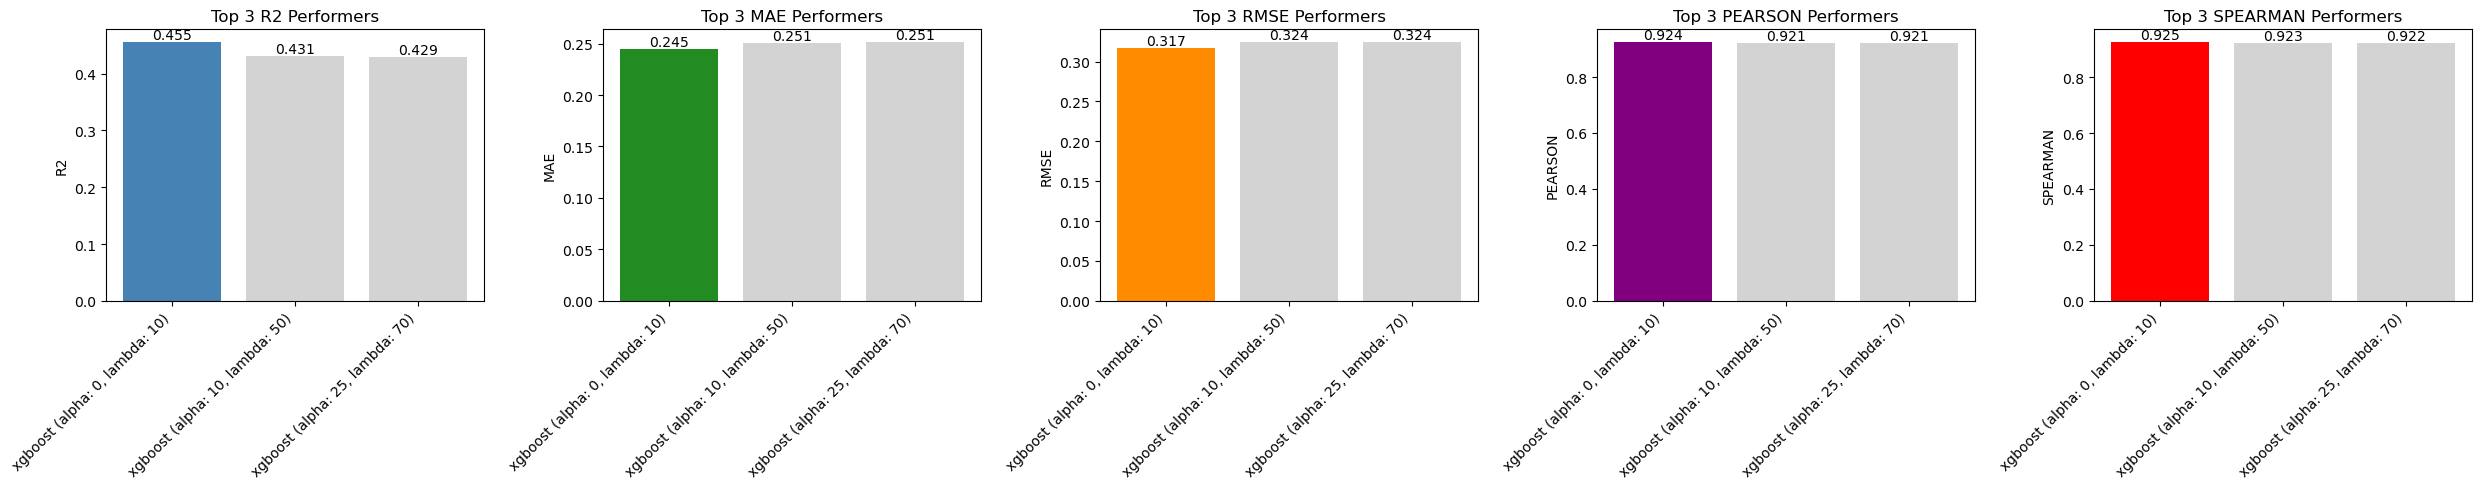

In [2]:
# Select the task for individual method comparison
selected_task = 'top5_spat_msi_full_rna'  # Change this to analyze a different task

# Load the data for the selected task
file_path = os.path.join('/lustre/groups/ml01/workspace/eirini.giannakoulia/no_fs_pipeline/data/reports', selected_task, 'merged_results.tsv')
df = pd.read_csv(file_path, sep='\t')

# Define metrics and their optimization direction
metrics = ['r2', 'mae', 'rmse', 'pearson', 'spearman']
best_direction = {
    'r2': 'max',
    'mae': 'min',
    'rmse': 'min',
    'pearson': 'max',
    'spearman': 'max'
}

# Define highlight colors
highlight_colors = {
    'r2': 'steelblue',
    'mae': 'forestgreen',
    'rmse': 'darkorange',
    'pearson': 'purple',
    'spearman': 'red'
}
default_color = 'lightgray'

# Function to create a concise summary of a method and its parameters
def get_method_summary(method_name, method_params):
    try:
        # Convert to a dictionary if it's a string representation.
        if not isinstance(method_params, dict):
            params_dict = eval(method_params)
        else:
            params_dict = method_params
        # Get the first two key-value pairs.
        first_items = list(params_dict.items())[:2]
        params_info = ", ".join([f"{k}: {v}" for k, v in first_items])
        return f"{method_name} ({params_info})"
    except Exception:
        return f"{method_name}"

# Dictionary to store the top 3 performances per metric
top_performers = {}

for metric in metrics:
    if best_direction[metric] == 'max':
        top_indices = df[metric].nlargest(3).index
    else:
        top_indices = df[metric].nsmallest(3).index
    
    top_performers[metric] = df.loc[top_indices, ['method_name', 'method_params', metric]]

# Create a subplot for each metric
num_metrics = len(metrics)
fig, axes = plt.subplots(1, num_metrics, figsize=(5 * num_metrics, 5), squeeze=False)

for i, metric in enumerate(metrics):
    ax = axes[0, i]
    
    # Get top 3 performers
    top_df = top_performers[metric]
    x_labels = [get_method_summary(row['method_name'], row['method_params']) for _, row in top_df.iterrows()]
    y_values = top_df[metric].values
    
    # Determine the overall best value for highlighting
    if best_direction[metric] == 'max':
        overall_best_value = max(y_values)
    else:
        overall_best_value = min(y_values)
    
    # Set colors
    colors = [highlight_colors[metric] if val == overall_best_value else default_color for val in y_values]

    # Plot bars
    bars = ax.bar(x_labels, y_values, color=colors)
    
    # Annotate bars
    for bar, value in zip(bars, y_values):
        ax.text(
            bar.get_x() + bar.get_width() / 2, value, f"{value:.3f}",
            ha='center', va='bottom', fontsize=10
        )

    ax.set_title(f"Top 3 {metric.upper()} Performers")
    ax.set_ylabel(metric.upper())
    ax.set_xticklabels(x_labels, rotation=45, ha='right')

plt.tight_layout()

save_directory = '/lustre/groups/ml01/workspace/eirini.giannakoulia/no_fs_pipeline/visualizations'
filename = 'comparison_plot.png'
full_path = os.path.join(save_directory, filename)
os.makedirs(save_directory, exist_ok=True)
plt.savefig(full_path, dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
import os

Saved plot for top5_spat_msi_full_rna: /lustre/groups/ml01/workspace/eirini.giannakoulia/no_fs_pipeline/visualizations/comparison_plot.png


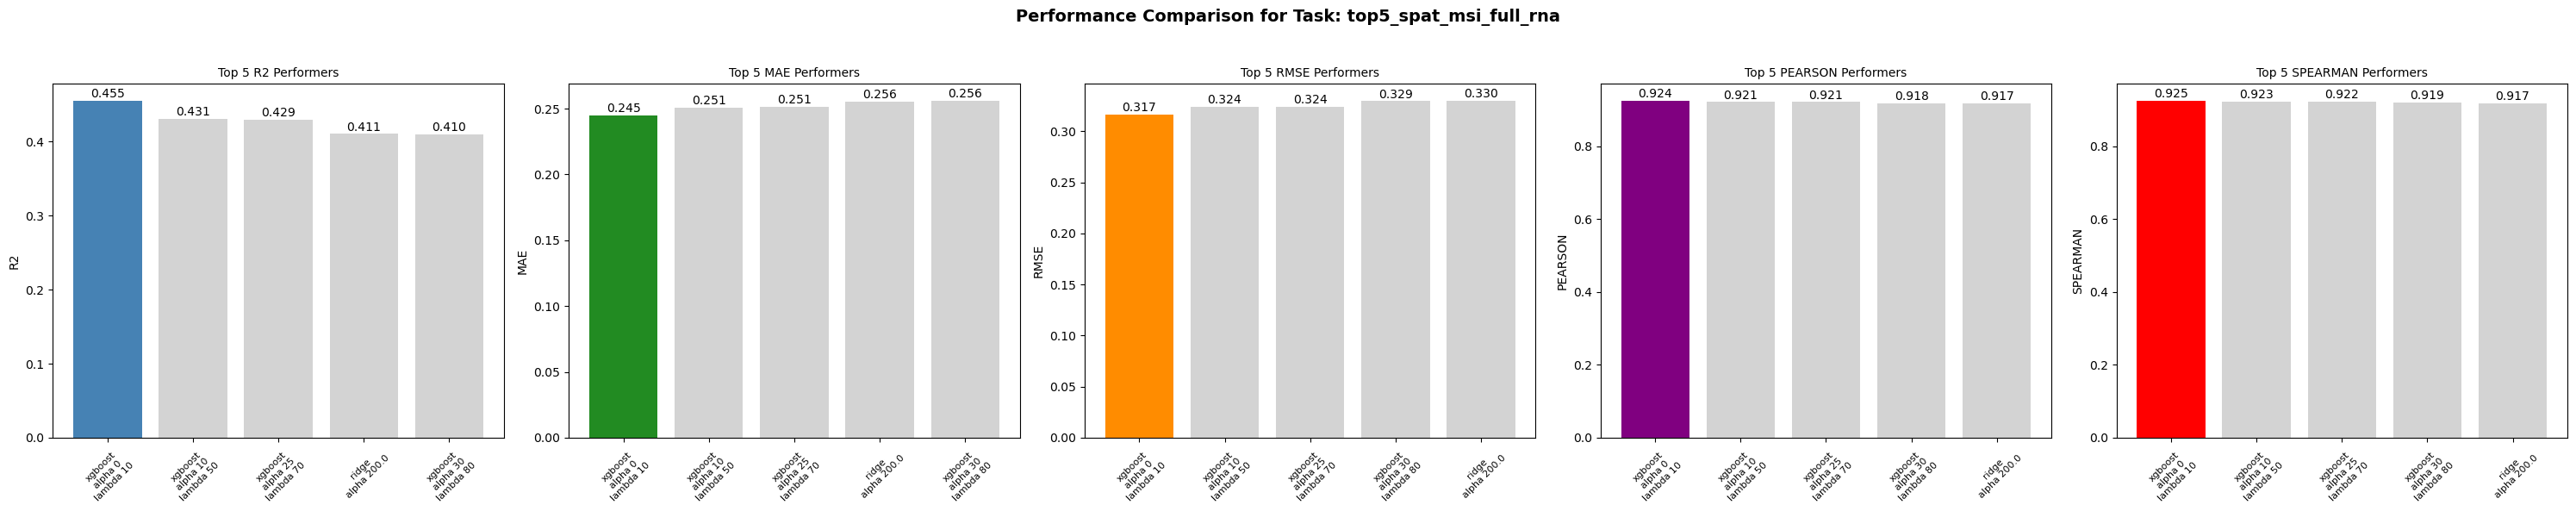

In [3]:

# Retrieve parameters from Snakemake
num_top_models = 5  # Number of top models to display
# selected_task = snakemake.wildcards.task  # Task name

# # Define paths
# file_path = os.path.join("data/reports", selected_task, "merged_results.tsv")
# save_directory = os.path.join("data/reports", selected_task)
# filename = f"metrics_visualisation_{selected_task}.png"
# full_path = os.path.join(save_directory, filename)

# Ensure save directory exists
# os.makedirs(save_directory, exist_ok=True)

selected_task = 'top5_spat_msi_full_rna'  # Change this to analyze a different task

# Load the data for the selected task
file_path = os.path.join('/lustre/groups/ml01/workspace/eirini.giannakoulia/no_fs_pipeline/data/reports', selected_task, 'merged_results.tsv')


# Load the data for the selected task
df = pd.read_csv(file_path, sep='\t')

# Define metrics and their optimization direction
metrics = ['r2', 'mae', 'rmse', 'pearson', 'spearman']
best_direction = {'r2': 'max', 'mae': 'min', 'rmse': 'min', 'pearson': 'max', 'spearman': 'max'}
highlight_colors = {'r2': 'steelblue', 'mae': 'forestgreen', 'rmse': 'darkorange', 'pearson': 'purple', 'spearman': 'red'}
default_color = 'lightgray'
text_color = 'white'  # White text for contrast inside bars

# Function to format method names and parameters as a multi-line label
def get_method_label(method_name, method_params):
    """Formats method name and parameters as a multi-line label, handling cases with fewer parameters."""
    try:
        if not isinstance(method_params, dict):
            params_dict = eval(method_params)  # Convert string to dictionary
        else:
            params_dict = method_params
        first_items = list(params_dict.items())[:2]  # Extract up to two key-value pairs
        params_summary = "\n".join([f"{k} {v}" for k, v in first_items]) if first_items else "No Params"
        return f"{method_name}\n{params_summary}"  # Format label with method name and parameters
    except Exception:
        return method_name  # Fallback to just the method name

# Dictionary to store top performers per metric
top_performers = {}

for metric in metrics:
    if metric in df.columns:
        if best_direction[metric] == 'max':
            top_indices = df[metric].nlargest(num_top_models).index
        else:
            top_indices = df[metric].nsmallest(num_top_models).index
        top_performers[metric] = df.loc[top_indices, ['method_name', 'method_params', metric]]

# Create a subplot for each metric
num_metrics = len(metrics)
fig, axes = plt.subplots(1, num_metrics, figsize=(6 * num_metrics, 6), squeeze=False)

# Add **big title (legend) above all plots** showing the task name
fig.suptitle(f"Performance Comparison for Task: {selected_task}", fontsize=14, fontweight='bold')

for i, metric in enumerate(metrics):
    ax = axes[0, i]

    if metric not in top_performers:
        continue

    top_df = top_performers[metric]
    method_labels = [get_method_label(row['method_name'], row['method_params']) for _, row in top_df.iterrows()]
    y_values = top_df[metric].values

    if best_direction[metric] == 'max':
        overall_best_value = max(y_values)
    else:
        overall_best_value = min(y_values)

    colors = [highlight_colors[metric] if val == overall_best_value else default_color for val in y_values]

    bars = ax.bar(method_labels, y_values, color=colors)

    # Add **VERTICAL** parameters inside bars and metric value above bars
    for bar, value, label in zip(bars, y_values, method_labels):

        # Add params inside the bars:
        # param_lines = label.split("\n")[1:] if "\n" in label else [""]
        # param_text = "\n".join(param_lines)  # Safely handle missing parameters
        # ax.text(
        #     bar.get_x() + bar.get_width() / 2,  # Center text horizontally
        #     max(value / 2, 0.05),  # Ensure text stays within the bar
        #     param_text,  # Display only the params inside the bar
        #     ha='center', va='center',
        #     fontsize=8, color=text_color, rotation=90,  # Rotate **vertically**
        #     wrap=True
        # )
        # Adjust metric value placement directly on top of the bar
        ax.text(
            bar.get_x() + bar.get_width() / 2, value + (ax.get_ylim()[1] * 0.002), f"{value:.3f}",
            ha='center', va='bottom', fontsize=10, color='black'
        )

        # ax.text(
        # bar.get_x() + bar.get_width() / 2, min(value * 1.05, ax.get_ylim()[1] * 0.95), f"{value:.3f}",
        # ha='center', va='bottom', fontsize=8, color='black'
        # )


    ax.set_title(f"Top {num_top_models} {metric.upper()} Performers", fontsize=10)
    ax.set_ylabel(metric.upper())

    # Center method names inside bars
    ax.set_xticks([bar.get_x() + bar.get_width() / 2 for bar in bars])
    ax.set_xticklabels(method_labels, rotation=45, ha='center', fontsize=8)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the title


# Save plot inside the corresponding task folder
plt.savefig(full_path, dpi=300, bbox_inches='tight')
print(f"Saved plot for {selected_task}: {full_path}")

plt.show()

In [5]:
os.getcwd()

'/ictstr01/home/icb/eirini.giannakoulia'

In [6]:
full_path

'/lustre/groups/ml01/workspace/eirini.giannakoulia/no_fs_pipeline/visualizations/comparison_plot.png'